In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Desktop\Salary_dataset.csv")

In [3]:
df.head()

,cgpa,package,Unnamed: 2
0,6.89,3.26,NaN
1,5.12,1.98,NaN
2,7.82,3.25,NaN
3,7.42,3.67,NaN
4,6.94,3.57,NaN


In [6]:
df.drop("Unnamed: 2",axis = 1 ,inplace = True)

In [7]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

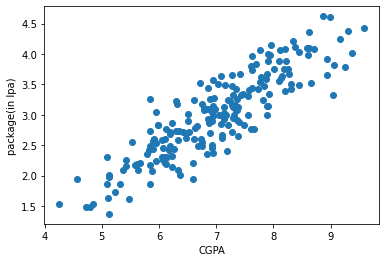

In [9]:
plt.scatter(df["cgpa"] , df["package"])
plt.xlabel("CGPA")
plt.ylabel("package(in lpa)")

In [10]:
#### Splitting the data x and y


In [11]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [12]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train,y_train)

LinearRegression()

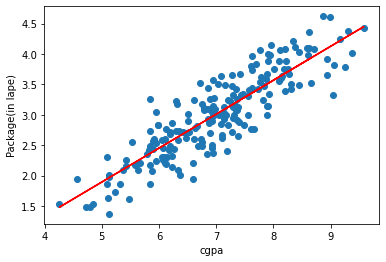

In [18]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color ='red')
plt.xlabel("cgpa")
plt.ylabel("Package(in lape)")
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [21]:
y_pred = lr.predict(X_test)

In [22]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [23]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [24]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [25]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [26]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [27]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [28]:

1 - ((1-r2)*(40-1)/(40-1-1))


0.7749598882343415

In [36]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.805025,3.26
1,5.12,0.471929,1.98
2,7.82,0.336369,3.25
3,7.42,0.738717,3.67
4,6.94,0.924280,3.57


Text(0, 0.5, 'Package(in lpa)')

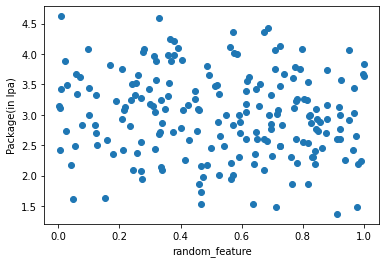

In [37]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [40]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:

lr = LinearRegression()

In [42]:
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(X_test)

In [44]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7809876019092343


In [45]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7691490939043281

In [46]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [47]:
new_df2.sample(5)

,cgpa,iq,package
41,6.89,2.10,2.70
108,7.76,4.24,3.54
57,6.60,2.44,1.94
77,8.99,5.60,4.60
180,6.19,1.82,2.72


Text(0, 0.5, 'Package(in lpa)')

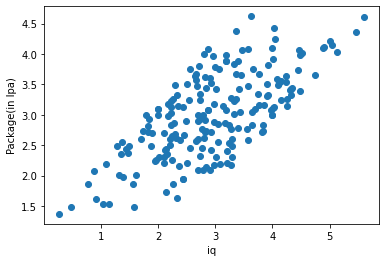

In [48]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [49]:

np.random.randint(-100,100)

17

In [50]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [53]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7943468422266656


In [54]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7832304553199989